In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
image_dim=32 #give the image a dimension&it's const. 32 or 64

In [2]:
def parse_function(filenames): #bta5od el filename w btrg3ly el sora 
    #print(filename.label) 
    image_string=tf.read_file(filenames)
    
    #don't use tf.image.decode_image, or output shape will not be defined
    image=tf.image.decode_png(image_string,channels=3 )#for RGB #watchout for the comment
    
    #this will convert to float vals. in [0,1]
    image=tf.image.convert_image_dtype(image,tf.float32)
    
    resized_image=tf.image.resize_images(image,[image_dim,image_dim])
    return resized_image #,label

In [3]:
def train_preprocess(image): #shwyt 3mlyat btt3ml 3la el sora 3shan el training
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image,max_delta=32.0/255.0) #why?
    image = tf.image.random_saturation(image, lower=0.5,upper=1.5)
    
    #Make sure the image is still in [0,1]
    image=tf.clip_by_value(image, 0.0, 1.0)
    
    return image #,label
#shift+enter

In [4]:
def read_data(filenames):
    dataset  = tf.data.Dataset.from_tensor_slices((filenames))
    dataset  = dataset.map(parse_function)
    dataset  = dataset.map(train_preprocess)
    iterator = dataset.make_one_shot_iterator()
    return iterator
#shift+enter

In [5]:
def build_training(filenames):
    X=np.zeros((len(filenames),image_dim,image_dim,3))
    iterator =read_data(filenames)
    next_element = iterator.get_next()
    with tf.Session() as sess:
        for i in range(len(filenames)):
            image_example=sess.run(next_element)
            X[i,:,:]=image_example[:,:,:]
    return X
#shift+enter

In [ ]:
#import tensorflow as tf #we've already done that before so it's optional :)
filenames=['A_1.jpg','A_2.jpg','A_3.jpg','A_4.jpg','A_5.jpg','A_6.jpg','A_7.jpg','A_8.jpg','A_9.jpg','A_10.jpg',
          'B_1.jpg','B_2.jpg','B_3.jpg','B_4.jpg','B_5.jpg','B_6.jpg','B_7.jpg','B_8.jpg','B_9.jpg','B_10.jpg',
          'C_1.jpg','C_2.jpg','C_3.jpg','C_4.jpg','C_5.jpg','C_6.jpg','C_7.jpg','C_8.jpg','C_9.jpg','C_10.jpg',
          'D_1.jpg','D_2.jpg','D_3.jpg','D_4.jpg','D_5.jpg','D_6.jpg','D_7.jpg','D_8.jpg','D_9.jpg','D_10.jpg',
          'E_1.jpg','E_2.jpg','E_3.jpg','E_4.jpg','E_5.jpg','E_6.jpg','E_7.jpg','E_8.jpg','E_9.jpg','E_10.jpg',
          'F_1.jpg','F_2.jpg','F_3.jpg','F_4.jpg','F_5.jpg','F_6.jpg','F_7.jpg','F_8.jpg','F_9.jpg','F_10.jpg',
          'G_1.jpg','G_2.jpg','G_3.jpg','G_4.jpg','G_5.jpg','G_6.jpg','G_7.jpg','G_8.jpg','G_9.jpg','G_10.jpg',
          'H_1.jpg','H_2.jpg','H_3.jpg','H_4.jpg','H_5.jpg','H_6.jpg','H_7.jpg','H_8.jpg','H_9.jpg','H_10.jpg',
          'I_1.jpg','I_2.jpg','I_3.jpg','I_4.jpg','I_5.jpg','I_6.jpg','I_7.jpg','I_8.jpg','I_9.jpg','I_10.jpg',
          'J_1.jpg','J_2.jpg','J_3.jpg','J_4.jpg','J_5.jpg','J_6.jpg','J_7.jpg','J_8.jpg','J_9.jpg','J_10.jpg']#enter filenames of imgs
Y=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
           ,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
           ,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
X=build_training(filenames)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), #btrg3haly msfofa f bo3d wa7d
    tf.keras.layers.Dense(image_dim*image_dim*3,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.7), #optional h5tr3 rqm random msln 0.7 w ana mdelo rqm w yrg3 yshof yqarn bl rqm elly mdeholo lw tl3 2kbr mno yrg3 blneuron w lw 2s8r hyrg3 b zero
    tf.keras.layers.Dense(100,activation=tf.nn.softmax) #number of classes,act func of classification
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X, Y, epochs=1000) #between 1000 & 10000
                              
model.summary()                              

model.evaluate(X,Y)

Epoch 1/1000
100/100 [==============================] - 1s 13ms/step - loss: 12.0281 - acc: 0.0100
Epoch 2/1000
100/100 [==============================] - 1s 6ms/step - loss: 11.1798 - acc: 0.0100
Epoch 3/1000
100/100 [==============================] - 1s 7ms/step - loss: 10.9248 - acc: 0.0100
Epoch 4/1000
100/100 [==============================] - 1s 7ms/step - loss: 10.8933 - acc: 0.0100
Epoch 5/1000
100/100 [==============================] - 1s 7ms/step - loss: 10.9735 - acc: 0.0100
Epoch 6/1000
100/100 [==============================] - 1s 7ms/step - loss: 10.7026 - acc: 0.0000e+00
Epoch 7/1000
100/100 [==============================] - 1s 7ms/step - loss: 10.7741 - acc: 0.0000e+00
Epoch 8/1000
100/100 [==============================] - 1s 6ms/step - loss: 10.8054 - acc: 0.0100
Epoch 9/1000
100/100 [==============================] - 1s 7ms/step - loss: 10.7061 - acc: 0.0100
Epoch 10/1000
100/100 [==============================] - 1s 7ms/step - loss: 10.7041 - acc: 0.0000e+00
Epoch 

100/100 [==============================] - 1s 6ms/step - loss: 4.5928 - acc: 0.0100
Epoch 85/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5942 - acc: 0.0100
Epoch 86/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5935 - acc: 0.0200
Epoch 87/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5918 - acc: 0.0100
Epoch 88/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5910 - acc: 0.0100
Epoch 89/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5989 - acc: 0.0100
Epoch 90/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5957 - acc: 0.0100
Epoch 91/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5889 - acc: 0.0100
Epoch 92/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5951 - acc: 0.0200
Epoch 93/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5966 - acc: 0.0200
Epoch 94/1000
100/100 [===========

100/100 [==============================] - 1s 6ms/step - loss: 4.5525 - acc: 0.0100
Epoch 168/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5572 - acc: 0.0100
Epoch 169/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5634 - acc: 0.0100
Epoch 170/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5523 - acc: 0.0100
Epoch 171/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5587 - acc: 0.0200
Epoch 172/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5593 - acc: 0.0200
Epoch 173/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5530 - acc: 0.0100
Epoch 174/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5578 - acc: 0.0100
Epoch 175/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5558 - acc: 0.0100
Epoch 176/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5526 - acc: 0.0100
Epoch 177/1000
100/100 [=

100/100 [==============================] - 1s 6ms/step - loss: 4.5345 - acc: 0.0100
Epoch 250/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5367 - acc: 0.0100
Epoch 251/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5256 - acc: 0.0100
Epoch 252/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5291 - acc: 0.0100
Epoch 253/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5250 - acc: 0.0200
Epoch 254/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5253 - acc: 0.0200
Epoch 255/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5232 - acc: 0.0100
Epoch 256/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5231 - acc: 0.0200
Epoch 257/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5237 - acc: 0.0200
Epoch 258/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.5229 - acc: 0.0100
Epoch 259/1000
100/100 [=

100/100 [==============================] - 1s 6ms/step - loss: 4.4741 - acc: 0.0200
Epoch 332/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4827 - acc: 0.0200
Epoch 333/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4747 - acc: 0.0200
Epoch 334/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4735 - acc: 0.0200
Epoch 335/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4842 - acc: 0.0300
Epoch 336/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4882 - acc: 0.0100
Epoch 337/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4900 - acc: 0.0200
Epoch 338/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4744 - acc: 0.0200
Epoch 339/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4774 - acc: 0.0200
Epoch 340/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4731 - acc: 0.0200
Epoch 341/1000
100/100 [=

100/100 [==============================] - 1s 6ms/step - loss: 4.4174 - acc: 0.0200
Epoch 414/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4316 - acc: 0.0200
Epoch 415/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4190 - acc: 0.0200
Epoch 416/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4204 - acc: 0.0300
Epoch 417/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4148 - acc: 0.0200
Epoch 418/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4155 - acc: 0.0200
Epoch 419/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4144 - acc: 0.0200
Epoch 420/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4127 - acc: 0.0200
Epoch 421/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4117 - acc: 0.0200
Epoch 422/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4105 - acc: 0.0200
Epoch 423/1000
100/100 [=

100/100 [==============================] - 1s 6ms/step - loss: 4.3964 - acc: 0.0200
Epoch 496/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.3632 - acc: 0.0400
Epoch 497/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.3690 - acc: 0.0300
Epoch 498/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.3910 - acc: 0.0200
Epoch 499/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.3725 - acc: 0.0300
Epoch 500/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.3676 - acc: 0.0300
Epoch 501/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.3597 - acc: 0.0300
Epoch 502/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.3910 - acc: 0.0300
Epoch 503/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.3598 - acc: 0.0300
Epoch 504/1000
100/100 [==============================] - 1s 6ms/step - loss: 4.4016 - acc: 0.0200
Epoch 505/1000
100/100 [=

TypeError: Image data cannot be converted to float

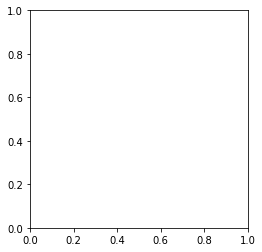

In [7]:
plt.imshow(filenames)
plt.show()